In [233]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [234]:
#importation des librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from pandas_profiling import ProfileReport

In [ ]:
BonusMalus= pd.read_csv(r"/gdrive/MyDrive/ClassesBonusMalus.csv")

In [ ]:
BonusMalus

,CodeBonusMalus_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus
0,117346,116167,111858,101772,101691,1,V,2017-07-14 00:00:00.000000,1,1,70
1,117347,116168,111859,99417,99336,10,V,2017-07-14 00:00:00.000000,1,1,80
2,117348,116169,111860,101773,101692,1,V,2017-07-14 00:00:00.000000,1,1,70
3,117349,116170,111861,101774,101693,1,V,2017-07-14 00:00:00.000000,1,1,70
4,117350,116171,111862,101775,101694,1,V,2017-07-14 00:00:00.000000,2,2,80
...,...,...,...,...,...,...,...,...,...,...,...
921531,658899,654359,559180,230555,230480,1,V,2017-12-17 00:00:00.000000,4,4,100
921532,658900,654360,559181,362916,362943,5,V,2017-05-25 00:00:00.000000,4,4,120
921533,658901,654361,556851,528931,528936,1,V,2016-10-03 00:00:00.000000,1,1,70
921534,658902,654362,559182,266358,258175,6,V,2017-12-17 00:00:00.000000,2,2,90


# **I-PreProcessing:**

In [ ]:
BonusMalus.columns

Index(['CodeBonusMalus_id', 'CodePolice_id', 'CodeVehicule_id',
       'CodeAssure_id', 'CodeSouscripteur_id', 'codeUsage', 'ETAT_VEHICULE',
       'DATE_AFFECTATION', 'classeBonusMalus', 'classeBonusMalusCompagnie',
       'coefBonusMalus'],
      dtype='object')

In [ ]:
BonusMalus.shape

(921536, 11)

In [ ]:
BonusMalus.isnull().sum()

CodeBonusMalus_id            0
CodePolice_id                0
CodeVehicule_id              0
CodeAssure_id                0
CodeSouscripteur_id          0
codeUsage                    0
ETAT_VEHICULE                0
DATE_AFFECTATION             0
classeBonusMalus             0
classeBonusMalusCompagnie    0
coefBonusMalus               0
dtype: int64

In [ ]:
BonusMalus["classeBonusMalus"].unique()

array([ 1,  2,  3,  6,  7,  8,  4,  9,  5, 11, 10])

Il ya 11 Classes BonusMalus à etudier.

In [ ]:
Vehicule_clean = pd.read_csv(r"/gdrive/MyDrive/Vehicule.csv")

In [ ]:
df_merge=pd.merge(Vehicule_clean,BonusMalus,left_on="CodeVehicule_id",right_on="CodeVehicule_id")

In [ ]:
df_merge

,CodeVehicule_id,codeMarque,puissanceFiscal,typeImmatriculation,energie,dateInsertion,CodeBonusMalus_id,CodePolice_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus
0,696264,152,5,TU,ESSENCE,2017-10-05,868429,863646,668681,668688,1,V,2017-06-14 00:00:00.000000,5,5,120
1,696265,107,4,TU,ESSENCE,2017-10-05,868430,863647,668682,668689,1,V,2016-07-06 00:00:00.000000,1,1,70
2,696266,808,5,TU,ESSENCE,2017-10-05,868431,863648,668683,668690,1,V,2016-04-30 00:00:00.000000,4,4,100
3,696267,30,8,TU,GASOIL,2017-10-05,868432,863649,668684,668691,5,V,2016-05-08 00:00:00.000000,2,2,90
4,696268,29,7,TU,GASOIL,2017-10-05,868433,863650,370720,370747,5,V,2016-04-26 00:00:00.000000,2,2,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862495,685055,107,5,TU,GASOIL,2017-10-05,1436329,1428275,1067914,1067531,1,V,2016-04-01 00:00:00.000000,4,4,100
862496,685056,376,10,TU,GASOIL,2017-10-05,1316495,1311618,1025698,1025711,2,V,2017-09-14 00:00:00.000000,5,5,150
862497,685057,29,7,TU,GASOIL,2017-10-05,1090459,1085667,844047,844057,3,V,2017-10-03 00:00:00.000000,5,5,150
862498,685059,29,5,TU,GASOIL,2017-10-05,872365,867582,657249,657256,5,V,2017-02-07 00:00:00.000000,1,1,80


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862500 entries, 0 to 862499
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   CodeVehicule_id            862500 non-null  int64 
 1   codeMarque                 862500 non-null  int64 
 2   puissanceFiscal            862500 non-null  int64 
 3   typeImmatriculation        862500 non-null  object
 4   energie                    862500 non-null  object
 5   dateInsertion              862500 non-null  object
 6   CodeBonusMalus_id          862500 non-null  int64 
 7   CodePolice_id              862500 non-null  int64 
 8   CodeAssure_id              862500 non-null  int64 
 9   CodeSouscripteur_id        862500 non-null  int64 
 10  codeUsage                  862500 non-null  int64 
 11  ETAT_VEHICULE              862500 non-null  object
 12  DATE_AFFECTATION           862500 non-null  object
 13  classeBonusMalus           862500 non-null  

In [ ]:
Police_clean = pd.read_csv(r"/gdrive/MyDrive/Police.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
Police_clean

,CodePolice_id,codeCompagnie,codeAgence,typeIntermediaire,numPolice,naturePolice,typePolice,Etat_Police,dateEffetPolice,dateEcheancePolice
0,545568,1,599,1,20155.0076050/6,R,I,R,2015-10-13,1013.0
1,545569,1,655,1,20155.0076056/5,R,I,V,2015-10-13,1013.0
2,545570,1,757,1,20155.0076058/9,R,I,V,2015-10-13,1013.0
3,545571,1,636,1,20155.0076059/4,R,I,V,2015-10-13,1013.0
4,545572,1,610,1,20155.0076062/9,R,I,V,2015-10-13,1013.0
...,...,...,...,...,...,...,...,...,...,...
937275,437233,1,626,1,201650000043769,R,I,V,2016-05-31,531.0
937276,437234,1,585,1,201650000043774,R,I,V,2016-05-31,531.0
937277,437235,1,576,1,201650000043782,R,I,V,2016-05-31,531.0
937278,437236,1,768,1,201650000043794,R,I,R,2016-05-31,531.0


In [ ]:
Police_clean.shape

(937280, 10)

In [ ]:
Police_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937280 entries, 0 to 937279
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CodePolice_id       937280 non-null  int64  
 1   codeCompagnie       937280 non-null  int64  
 2   codeAgence          937280 non-null  object 
 3   typeIntermediaire   937280 non-null  int64  
 4   numPolice           937280 non-null  object 
 5   naturePolice        937280 non-null  object 
 6   typePolice          937280 non-null  object 
 7   Etat_Police         937280 non-null  object 
 8   dateEffetPolice     937280 non-null  object 
 9   dateEcheancePolice  845396 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 71.5+ MB


In [ ]:
Police_clean.isnull().sum()

CodePolice_id             0
codeCompagnie             0
codeAgence                0
typeIntermediaire         0
numPolice                 0
naturePolice              0
typePolice                0
Etat_Police               0
dateEffetPolice           0
dateEcheancePolice    91884
dtype: int64

In [ ]:
df_merge2=pd.merge(Police_clean,df_merge,left_on="CodePolice_id",right_on="CodePolice_id")

In [ ]:
df_merge2

,CodePolice_id,codeCompagnie,codeAgence,typeIntermediaire,numPolice,naturePolice,typePolice,Etat_Police,dateEffetPolice,dateEcheancePolice,CodeVehicule_id,codeMarque,puissanceFiscal,typeImmatriculation,energie,dateInsertion,CodeBonusMalus_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus
0,545568,1,599,1,20155.0076050/6,R,I,R,2015-10-13,1013.0,467918,29,5,TU,GASOIL,2017-10-05,550108,444953,444957,1,V,2017-10-13 00:00:00.000000,5,5,120
1,545569,1,655,1,20155.0076056/5,R,I,V,2015-10-13,1013.0,467919,107,8,TU,GASOIL,2017-10-05,550109,444954,444958,5,V,2017-10-13 00:00:00.000000,3,3,100
2,545570,1,757,1,20155.0076058/9,R,I,V,2015-10-13,1013.0,467920,184,15,TU,GASOIL,2017-10-05,550110,99315,99234,6,V,2016-10-13 00:00:00.000000,1,1,80
3,545571,1,636,1,20155.0076059/4,R,I,V,2015-10-13,1013.0,467921,30,5,TU,ESSENCE,2017-10-05,550111,444955,444959,1,V,2016-10-13 00:00:00.000000,1,1,70
4,545572,1,610,1,20155.0076062/9,R,I,V,2015-10-13,1013.0,467922,368,29,TU,GASOIL,2017-10-05,550112,350665,350692,6,V,2017-10-13 00:00:00.000000,2,2,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500522,437233,1,626,1,201650000043769,R,I,V,2016-05-31,531.0,376338,29,6,TU,ESSENCE,2017-10-05,441743,361896,361923,1,V,2016-05-31 00:00:00.000000,6,6,140
500523,437234,1,585,1,201650000043774,R,I,V,2016-05-31,531.0,376339,107,4,TU,ESSENCE,2017-10-05,441744,361897,361924,1,V,2016-05-31 00:00:00.000000,1,1,70
500524,437235,1,576,1,201650000043782,R,I,V,2016-05-31,531.0,376340,119,7,TU,GASOIL,2017-10-05,441745,361898,361925,5,V,2016-05-31 00:00:00.000000,3,3,100
500525,437236,1,768,1,201650000043794,R,I,R,2016-05-31,531.0,376341,107,6,TU,ESSENCE,2017-10-05,441746,361899,361926,1,V,2016-05-31 00:00:00.000000,5,5,120


In [ ]:
df_merge2.shape

(500527, 25)

In [ ]:
Assure = pd.read_csv(r"/gdrive/MyDrive/Assure.csv")

In [ ]:
Assure

,CodeAssure_id
0,753885
1,753886
2,753887
3,753888
4,753889
...,...
1041228,753880
1041229,753881
1041230,753882
1041231,753883


In [ ]:
df_merge3=pd.merge(Assure,df_merge2,left_on="CodeAssure_id",right_on="CodeAssure_id")

In [ ]:
df_merge3

,CodeAssure_id,CodePolice_id,codeCompagnie,codeAgence,typeIntermediaire,numPolice,naturePolice,typePolice,Etat_Police,dateEffetPolice,dateEcheancePolice,CodeVehicule_id,codeMarque,puissanceFiscal,typeImmatriculation,energie,dateInsertion,CodeBonusMalus_id,CodeSouscripteur_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus
0,753885,975337,14,55,2,555111122,R,I,V,2013-08-07,807.0,782161,107,5,TU,ESSENCE,2017-10-05,980120,753893,1,V,2017-08-07 00:00:00.000000,3,3,90
1,753886,975338,14,630,1,555027531,R,I,V,2013-08-07,807.0,782162,29,5,TU,GASOIL,2017-10-05,980121,753894,1,V,2017-08-07 00:00:00.000000,3,3,90
2,753887,975339,14,615,1,555026476,R,I,V,2013-02-26,226.0,782163,30,5,TU,GASOIL,2017-10-05,980122,753895,1,V,2017-02-26 00:00:00.000000,3,3,90
3,753888,975341,14,914,2,555285252,R,I,V,2016-10-13,1013.0,782165,119,4,TU,ESSENCE,2017-10-05,980124,753896,1,V,2016-10-13 00:00:00.000000,2,2,80
4,753889,975342,14,336,1,555245309,R,I,V,2016-05-17,517.0,77195,29,4,TU,ESSENCE,2017-10-05,980125,753897,1,V,2016-05-17 00:00:00.000000,8,8,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500522,753880,975330,14,907,1,504064518,R,I,V,2015-11-24,1124.0,782154,323,6,TU,GASOIL,2017-10-05,980113,753888,5,V,2016-11-24 00:00:00.000000,6,6,170
500523,753881,975331,14,315,1,504062934,R,I,V,2012-01-24,124.0,782155,105,4,TU,ESSENCE,2017-10-05,980114,753889,1,V,2018-01-24 00:00:00.000000,2,2,80
500524,753882,975332,14,911,1,555021223,R,I,V,2013-03-30,330.0,782156,30,4,TU,ESSENCE,2017-10-05,980115,753890,1,V,2017-03-30 00:00:00.000000,3,3,90
500525,753883,975334,14,618,1,555026741,R,I,V,2013-03-06,306.0,782158,178,10,TU,GASOIL,2017-10-05,980117,753891,1,V,2016-03-06 00:00:00.000000,1,1,70


In [ ]:
df_merge3.columns

Index(['CodeAssure_id', 'CodePolice_id', 'codeCompagnie', 'codeAgence',
       'typeIntermediaire', 'numPolice', 'naturePolice', 'typePolice',
       'Etat_Police', 'dateEffetPolice', 'dateEcheancePolice',
       'CodeVehicule_id', 'codeMarque', 'puissanceFiscal',
       'typeImmatriculation', 'energie', 'dateInsertion', 'CodeBonusMalus_id',
       'CodeSouscripteur_id', 'codeUsage', 'ETAT_VEHICULE', 'DATE_AFFECTATION',
       'classeBonusMalus', 'classeBonusMalusCompagnie', 'coefBonusMalus',
       'fraude'],
      dtype='object')

In [ ]:
Sinistre = pd.read_csv(r"/gdrive/MyDrive/sinistre_clean2.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
Sinistre.shape

(585267, 23)

In [ ]:
Sinistre

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,dateDeSurvenanceDuSinistre,heureSurvanceDusinistre,dateOuvertureDuSinistre,lieuDuSinistre,identificationTiers,pourcentadeDeResponsabilite,numeroDePoliceCompagnieAdverse,codeCompagnieAdverse,porcentageCompagnieAdverse,numeroImmatriculationVehiculeAdverse,typeImmatriculationVehiculeAdverse,mouvementDusinistre,natureDuSinistre,Calculer_Sinistre,lieuDuSinistreajuste,heureSurvanceDusinistreajuste,fraud,mois,saison
0,NaN,NaN,NaN,NaN,2017-12-18,0.0,2017-12-18,NaN,NaN,0,834736,11.0,0,1651TU133,TU,2.0,M,1,inconnu,0,0,12,hiver
1,NaN,NaN,NaN,NaN,2018-02-16,0.0,2018-02-16,NaN,NaN,0,NaN,1.0,0,7046TU163,TU,2.0,M,1,inconnu,0,0,2,hiver
2,NaN,NaN,NaN,NaN,2017-03-11,0.0,2017-03-27,NaN,NaN,100,10204000027,4.0,0,3626TU159,TU,3.0,M,1,inconnu,0,0,3,printemps
3,NaN,NaN,NaN,NaN,2017-11-23,0.0,2017-11-27,NaN,NaN,0,101160000565,4.0,0,8312TU163,TU,3.0,M,1,inconnu,0,0,11,automne
4,NaN,NaN,NaN,NaN,2017-02-23,0.0,2017-03-02,NaN,NaN,0,20075.0336001/3,1.0,0,9213TU96,TU,3.0,M,1,inconnu,0,0,3,printemps
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585262,NaN,NaN,NaN,NaN,2017-05-24,NaN,2017-05-24,NaN,NaN,100,NaN,NaN,0,NaN,NaN,NaN,M,0,inconnu,0,0,5,printemps
585263,NaN,NaN,NaN,NaN,2017-05-24,NaN,2017-05-24,NaN,NaN,100,NaN,NaN,0,NaN,NaN,NaN,M,0,inconnu,0,0,5,printemps
585264,NaN,NaN,NaN,NaN,2017-05-24,NaN,2017-05-24,NaN,NaN,100,NaN,NaN,0,NaN,NaN,NaN,M,0,inconnu,0,0,5,printemps
585265,NaN,NaN,NaN,NaN,2017-03-17,NaN,2017-03-17,NaN,NaN,0,NaN,NaN,100,NaN,NaN,NaN,M,0,inconnu,0,0,3,printemps


In [ ]:
Sinistre.isna().sum()

Unnamed: 0                              585267
Unnamed: 1                              585267
Unnamed: 2                              585267
Unnamed: 3                              585267
dateDeSurvenanceDuSinistre                   0
heureSurvanceDusinistre                  24332
dateOuvertureDuSinistre                      0
lieuDuSinistre                          361882
identificationTiers                     369844
pourcentadeDeResponsabilite                  0
numeroDePoliceCompagnieAdverse          380121
codeCompagnieAdverse                    302615
porcentageCompagnieAdverse                   0
numeroImmatriculationVehiculeAdverse    364894
typeImmatriculationVehiculeAdverse      358613
mouvementDusinistre                      24332
natureDuSinistre                             0
Calculer_Sinistre                            0
lieuDuSinistreajuste                         0
heureSurvanceDusinistreajuste                0
fraud                                        0
mois         

In [ ]:
Sinistre_clean1 = Sinistre.drop(Sinistre.columns[[0, 1, 2, 3, 8]], axis=1)

In [ ]:
Sinistre_clean1

,dateDeSurvenanceDuSinistre,heureSurvanceDusinistre,dateOuvertureDuSinistre,lieuDuSinistre,pourcentadeDeResponsabilite,numeroDePoliceCompagnieAdverse,codeCompagnieAdverse,porcentageCompagnieAdverse,numeroImmatriculationVehiculeAdverse,typeImmatriculationVehiculeAdverse,mouvementDusinistre,natureDuSinistre,Calculer_Sinistre,lieuDuSinistreajuste,heureSurvanceDusinistreajuste,fraud,mois,saison
0,2017-12-18,0.0,2017-12-18,NaN,0,834736,11.0,0,1651TU133,TU,2.0,M,1,inconnu,0,0,12,hiver
1,2018-02-16,0.0,2018-02-16,NaN,0,NaN,1.0,0,7046TU163,TU,2.0,M,1,inconnu,0,0,2,hiver
2,2017-03-11,0.0,2017-03-27,NaN,100,10204000027,4.0,0,3626TU159,TU,3.0,M,1,inconnu,0,0,3,printemps
3,2017-11-23,0.0,2017-11-27,NaN,0,101160000565,4.0,0,8312TU163,TU,3.0,M,1,inconnu,0,0,11,automne
4,2017-02-23,0.0,2017-03-02,NaN,0,20075.0336001/3,1.0,0,9213TU96,TU,3.0,M,1,inconnu,0,0,3,printemps
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585262,2017-05-24,NaN,2017-05-24,NaN,100,NaN,NaN,0,NaN,NaN,NaN,M,0,inconnu,0,0,5,printemps
585263,2017-05-24,NaN,2017-05-24,NaN,100,NaN,NaN,0,NaN,NaN,NaN,M,0,inconnu,0,0,5,printemps
585264,2017-05-24,NaN,2017-05-24,NaN,100,NaN,NaN,0,NaN,NaN,NaN,M,0,inconnu,0,0,5,printemps
585265,2017-03-17,NaN,2017-03-17,NaN,0,NaN,NaN,100,NaN,NaN,NaN,M,0,inconnu,0,0,3,printemps


In [ ]:
Sinistre_clean1.isna().sum()

dateDeSurvenanceDuSinistre                   0
heureSurvanceDusinistre                  24332
dateOuvertureDuSinistre                      0
lieuDuSinistre                          361882
pourcentadeDeResponsabilite                  0
numeroDePoliceCompagnieAdverse          380121
codeCompagnieAdverse                    302615
porcentageCompagnieAdverse                   0
numeroImmatriculationVehiculeAdverse    364894
typeImmatriculationVehiculeAdverse      358613
mouvementDusinistre                      24332
natureDuSinistre                             0
Calculer_Sinistre                            0
lieuDuSinistreajuste                         0
heureSurvanceDusinistreajuste                0
fraud                                        0
mois                                         0
saison                                       0
dtype: int64

# **II-Détection des Fraudes:**

**Type De Fraude 1 : coeffcient Bonus Malus**

In [ ]:
len(df_merge3[(df_merge3["classeBonusMalus"]==1 ) & (df_merge3["coefBonusMalus"]!=70 )])

52752

In [ ]:
len(df_merge3[(df_merge3["classeBonusMalus"]==2 ) & (df_merge3["coefBonusMalus"]!=80 )])

30306

In [ ]:
len(df_merge3[(df_merge3["classeBonusMalus"]==3 ) & (df_merge3["coefBonusMalus"]!=90 )])

47987

In [ ]:
len(df_merge3[(df_merge3["classeBonusMalus"]==4 ) & (df_merge3["coefBonusMalus"]!=100 )])

11540

In [ ]:
len(df_merge3[(df_merge3["classeBonusMalus"]==5 ) & (df_merge3["coefBonusMalus"]!=120 )])

24516

In [ ]:
len(df_merge3[(df_merge3["classeBonusMalus"]==6 ) & (df_merge3["coefBonusMalus"]!=140 )])

2365

In [ ]:
len(df_merge3[(df_merge3["classeBonusMalus"]==7 ) & (df_merge3["coefBonusMalus"]!=160 )])

1193

In [ ]:
len(df_merge3[(df_merge3["classeBonusMalus"]==8 ) & (df_merge3["coefBonusMalus"]!=200 )])

0

In [ ]:
len(df_merge3[(df_merge3["classeBonusMalus"]==9 ) & (df_merge3["coefBonusMalus"]!=250 )])

3

In [ ]:
len(df_merge3[(df_merge3["classeBonusMalus"]==10 ) & (df_merge3["coefBonusMalus"]!=300 )])

7

In [ ]:
len(df_merge3[(df_merge3["classeBonusMalus"]==11 ) & (df_merge3["coefBonusMalus"]!=350 )])

2

**Comparaison de classe Bonus Malus avec Coeff Bonus Malus**

In [ ]:
df_merge3.loc[(df_merge3["classeBonusMalus"]==1 ) & (df_merge3["coefBonusMalus"]!=70 ),'fraude']=1
df_merge3.loc[(df_merge3["classeBonusMalus"]==2 ) & (df_merge3["coefBonusMalus"]!=80 ),'fraude']=1
df_merge3.loc[(df_merge3["classeBonusMalus"]==3 ) & (df_merge3["coefBonusMalus"]!=90 ),'fraude']=1
df_merge3.loc[(df_merge3["classeBonusMalus"]==4 ) & (df_merge3["coefBonusMalus"]!=100 ),'fraude']=1
df_merge3.loc[(df_merge3["classeBonusMalus"]==5 ) & (df_merge3["coefBonusMalus"]!=120 ),'fraude']=1
df_merge3.loc[(df_merge3["classeBonusMalus"]==6 ) & (df_merge3["coefBonusMalus"]!=140 ),'fraude']=1
df_merge3.loc[(df_merge3["classeBonusMalus"]==7 ) & (df_merge3["coefBonusMalus"]!=160 ),'fraude']=1
df_merge3.loc[(df_merge3["classeBonusMalus"]==8 ) & (df_merge3["coefBonusMalus"]!=200 ),'fraude']=1
df_merge3.loc[(df_merge3["classeBonusMalus"]==9 ) & (df_merge3["coefBonusMalus"]!=250 ),'fraude']=1
df_merge3.loc[(df_merge3["classeBonusMalus"]==10 ) & (df_merge3["coefBonusMalus"]!=300 ),'fraude']=1
df_merge3.loc[(df_merge3["classeBonusMalus"]==11 ) & (df_merge3["coefBonusMalus"]!=350 ),'fraude']=1

In [ ]:
len(df_merge3[df_merge3["fraude"]==1])

170671

In [ ]:
fig = plt.figure()

x = [1,2,3,4,5,6,7,8,9,10,11]
y1 = df_merge3[(df_merge3["classeBonusMalus"]==1) & (df_merge3["fraude"]==1)].shape[0]
y2 = df_merge3[(df_merge3["classeBonusMalus"]==2) & (df_merge3["fraude"]==1)].shape[0]
y3 = df_merge3[(df_merge3["classeBonusMalus"]==3) & (df_merge3["fraude"]==1)].shape[0]
y4 = df_merge3[(df_merge3["classeBonusMalus"]==4) & (df_merge3["fraude"]==1)].shape[0]
y5 = df_merge3[(df_merge3["classeBonusMalus"]==5) & (df_merge3["fraude"]==1)].shape[0]
y6 = df_merge3[(df_merge3["classeBonusMalus"]==6) & (df_merge3["fraude"]==1)].shape[0]
y7 = df_merge3[(df_merge3["classeBonusMalus"]==7) & (df_merge3["fraude"]==1)].shape[0]
y8 = df_merge3[(df_merge3["classeBonusMalus"]==8) & (df_merge3["fraude"]==1)].shape[0]
y9 = df_merge3[(df_merge3["classeBonusMalus"]==9) & (df_merge3["fraude"]==1)].shape[0]
y10 = df_merge3[(df_merge3["classeBonusMalus"]==10) & (df_merge3["fraude"]==1)].shape[0]
y11 = df_merge3[(df_merge3["classeBonusMalus"]==11) & (df_merge3["fraude"]==1)].shape[0]
height = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11]
width = 0.5

plt.bar(x, height, width)
plt.show()
plt.grid()

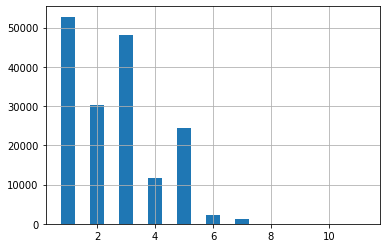

In [ ]:
fig

**Type De Fraude 2: Pourcentage De Responsabilite**

In [ ]:
Sinistre.drop(columns=["fraud"],inplace=True)

In [ ]:
Sinistre["fraude2"]=0

In [ ]:
Sinistre.loc[(Sinistre["pourcentadeDeResponsabilite"]>100),'fraude2']=1

In [ ]:
Sinistre["fraude2"].value_counts()

0    584189
1      1078
Name: fraude2, dtype: int64

In [ ]:
Sinistre.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'dateDeSurvenanceDuSinistre', 'heureSurvanceDusinistre',
       'dateOuvertureDuSinistre', 'lieuDuSinistre', 'identificationTiers',
       'pourcentadeDeResponsabilite', 'numeroDePoliceCompagnieAdverse',
       'codeCompagnieAdverse', 'porcentageCompagnieAdverse',
       'numeroImmatriculationVehiculeAdverse',
       'typeImmatriculationVehiculeAdverse', 'mouvementDusinistre',
       'natureDuSinistre', 'Calculer_Sinistre', 'lieuDuSinistreajuste',
       'heureSurvanceDusinistreajuste', 'mois', 'saison', 'fraude2'],
      dtype='object')

**Type De Fraude 3: Nombre de véhicules**

In [ ]:
list_nbr_voiture=df_merge3["CodePolice_id"].value_counts()
bd = dict(list_nbr_voiture)
df_nbr_voiture = pd.DataFrame(list(bd.items()),columns = ['cga_police_id','nombre_voiture'])

In [ ]:
df_nbr_voiture[df_nbr_voiture["nombre_voiture"]>5]

,cga_police_id,nombre_voiture
0,358106,282
1,358369,177
2,358131,132
3,358387,121
4,358624,113
...,...,...
112,358109,6
113,357877,6
114,357867,6
115,357890,6


 Ce qui déclare un nombre de véhicules >= 6 : Fraudeur

# **Préparation de Data final**

---



---



In [ ]:
df_concat =  pd.concat([BonusMalus,Sinistre_clean1,Police_clean], axis=1)

In [ ]:
df_concat.shape

(937280, 39)

In [ ]:
df_concat

,CodeBonusMalus_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus,dateDeSurvenanceDuSinistre,heureSurvanceDusinistre,dateOuvertureDuSinistre,lieuDuSinistre,pourcentadeDeResponsabilite,numeroDePoliceCompagnieAdverse,codeCompagnieAdverse,porcentageCompagnieAdverse,numeroImmatriculationVehiculeAdverse,typeImmatriculationVehiculeAdverse,mouvementDusinistre,natureDuSinistre,Calculer_Sinistre,lieuDuSinistreajuste,heureSurvanceDusinistreajuste,fraud,mois,saison,CodePolice_id,codeCompagnie,codeAgence,typeIntermediaire,numPolice,naturePolice,typePolice,Etat_Police,dateEffetPolice,dateEcheancePolice
0,117346.0,116167.0,111858.0,101772.0,101691.0,1.0,V,2017-07-14 00:00:00.000000,1.0,1.0,70.0,2017-12-18,0.0,2017-12-18,NaN,0.0,834736,11.0,0.0,1651TU133,TU,2.0,M,1.0,inconnu,0.0,0.0,12.0,hiver,545568,1,599,1,20155.0076050/6,R,I,R,2015-10-13,1013.0
1,117347.0,116168.0,111859.0,99417.0,99336.0,10.0,V,2017-07-14 00:00:00.000000,1.0,1.0,80.0,2018-02-16,0.0,2018-02-16,NaN,0.0,NaN,1.0,0.0,7046TU163,TU,2.0,M,1.0,inconnu,0.0,0.0,2.0,hiver,545569,1,655,1,20155.0076056/5,R,I,V,2015-10-13,1013.0
2,117348.0,116169.0,111860.0,101773.0,101692.0,1.0,V,2017-07-14 00:00:00.000000,1.0,1.0,70.0,2017-03-11,0.0,2017-03-27,NaN,100.0,10204000027,4.0,0.0,3626TU159,TU,3.0,M,1.0,inconnu,0.0,0.0,3.0,printemps,545570,1,757,1,20155.0076058/9,R,I,V,2015-10-13,1013.0
3,117349.0,116170.0,111861.0,101774.0,101693.0,1.0,V,2017-07-14 00:00:00.000000,1.0,1.0,70.0,2017-11-23,0.0,2017-11-27,NaN,0.0,101160000565,4.0,0.0,8312TU163,TU,3.0,M,1.0,inconnu,0.0,0.0,11.0,automne,545571,1,636,1,20155.0076059/4,R,I,V,2015-10-13,1013.0
4,117350.0,116171.0,111862.0,101775.0,101694.0,1.0,V,2017-07-14 00:00:00.000000,2.0,2.0,80.0,2017-02-23,0.0,2017-03-02,NaN,0.0,20075.0336001/3,1.0,0.0,9213TU96,TU,3.0,M,1.0,inconnu,0.0,0.0,3.0,printemps,545572,1,610,1,20155.0076062/9,R,I,V,2015-10-13,1013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437233,1,626,1,201650000043769,R,I,V,2016-05-31,531.0
937276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437234,1,585,1,201650000043774,R,I,V,2016-05-31,531.0
937277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437235,1,576,1,201650000043782,R,I,V,2016-05-31,531.0
937278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437236,1,768,1,201650000043794,R,I,R,2016-05-31,531.0


In [ ]:
df = df_concat.dropna()

In [ ]:
df_concat.columns

Index(['CodeBonusMalus_id', 'CodePolice_id', 'CodeVehicule_id',
       'CodeAssure_id', 'CodeSouscripteur_id', 'codeUsage', 'ETAT_VEHICULE',
       'DATE_AFFECTATION', 'classeBonusMalus', 'classeBonusMalusCompagnie',
       'coefBonusMalus', 'dateDeSurvenanceDuSinistre',
       'heureSurvanceDusinistre', 'dateOuvertureDuSinistre', 'lieuDuSinistre',
       'pourcentadeDeResponsabilite', 'numeroDePoliceCompagnieAdverse',
       'codeCompagnieAdverse', 'porcentageCompagnieAdverse',
       'numeroImmatriculationVehiculeAdverse',
       'typeImmatriculationVehiculeAdverse', 'mouvementDusinistre',
       'natureDuSinistre', 'Calculer_Sinistre', 'lieuDuSinistreajuste',
       'heureSurvanceDusinistreajuste', 'fraud', 'mois', 'saison',
       'CodePolice_id', 'codeCompagnie', 'codeAgence', 'typeIntermediaire',
       'numPolice', 'naturePolice', 'typePolice', 'Etat_Police',
       'dateEffetPolice', 'dateEcheancePolice'],
      dtype='object')

In [ ]:
df["natureDuSinistre"].value_counts()

M    123549
C      1352
Name: natureDuSinistre, dtype: int64

In [ ]:
conditionlist1 = [
    (df["natureDuSinistre"]=="M"),
    (df["natureDuSinistre"]=="C"),
     
    ]
choicelist1 = [1, 0]
df['natureDuSinistre'] = np.select(conditionlist1, choicelist1, default='Not Specified')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df["natureDuSinistre"].value_counts()

1    123549
0      1352
Name: natureDuSinistre, dtype: int64

In [ ]:
df["naturePolice"].value_counts()

R    124901
Name: naturePolice, dtype: int64

In [ ]:
df["typePolice"].value_counts()

I    124745
F       156
Name: typePolice, dtype: int64

In [ ]:
df["Etat_Police"].value_counts()

V    98295
R    26138
S      468
Name: Etat_Police, dtype: int64

In [ ]:
conditionlist2 = [
    (df["naturePolice"]=="R"),
     
    ]
choicelist2 = [0]
df['naturePolice'] = np.select(conditionlist2, choicelist2, default='Not Specified')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
conditionlist3 = [
    (df["typePolice"]=="F"),
    (df["typePolice"]=="I"),
     
    ]
choicelist3 = [1, 0]
df['typePolice'] = np.select(conditionlist3, choicelist3, default='Not Specified')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
conditionlist4 = [
    (df["Etat_Police"]=="V"),
    (df["Etat_Police"]=="R"),
    (df["Etat_Police"]=="S"),
     
    ]
choicelist4 = [1, 0, 2]
df['Etat_Police'] = np.select(conditionlist4, choicelist4, default='Not Specified')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
conditionlist5 = [
    (df["classeBonusMalus"]>8),
    (df["classeBonusMalus"]<=8),
     
    ]
choicelist5 = [1, 0]
df['MauvaiseClasseBM'] = np.select(conditionlist5, choicelist5, default='Not Specified')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
conditionlist6 = [

(df["classeBonusMalus"]==1 ) & (df["coefBonusMalus"]!=70 ),
(df["classeBonusMalus"]==2 ) & (df["coefBonusMalus"]!=80 ),
(df["classeBonusMalus"]==3 ) & (df["coefBonusMalus"]!=90 ),
(df["classeBonusMalus"]==4 ) & (df["coefBonusMalus"]!=100),
(df["classeBonusMalus"]==5 ) & (df["coefBonusMalus"]!=120 ),
(df["classeBonusMalus"]==6 ) & (df["coefBonusMalus"]!=140 ),
(df["classeBonusMalus"]==7 ) & (df["coefBonusMalus"]!=160 ),
(df["classeBonusMalus"]==8 ) & (df["coefBonusMalus"]!=200 ),
(df["classeBonusMalus"]==9 ) & (df["coefBonusMalus"]!=250 ),
(df["classeBonusMalus"]==10 ) & (df["coefBonusMalus"]!=300),
(df["classeBonusMalus"]==11 ) & (df["coefBonusMalus"]!=350),
(df["classeBonusMalus"]==1 ) & (df["coefBonusMalus"]==70 ),
(df["classeBonusMalus"]==2 ) & (df["coefBonusMalus"]==80 ),
(df["classeBonusMalus"]==3 ) & (df["coefBonusMalus"]==90 ),
(df["classeBonusMalus"]==4 ) & (df["coefBonusMalus"]==100),
(df["classeBonusMalus"]==5 ) & (df["coefBonusMalus"]==120 ),
(df["classeBonusMalus"]==6 ) & (df["coefBonusMalus"]==140 ),
(df["classeBonusMalus"]==7 ) & (df["coefBonusMalus"]==160 ),
(df["classeBonusMalus"]==8 ) & (df["coefBonusMalus"]==200 ),
(df["classeBonusMalus"]==9 ) & (df["coefBonusMalus"]==250 ),
(df["classeBonusMalus"]==10 ) & (df["coefBonusMalus"]==300),
(df["classeBonusMalus"]==11 ) & (df["coefBonusMalus"]==350),
     
    ]
choicelist6 = [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0]
df['FraudeurClasseBM'] = np.select(conditionlist6, choicelist6, default='Not Specified')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
conditionlist7 = [
    (df["MauvaiseClasseBM"]=='1') & (df["FraudeurClasseBM"]=='1')| (df["MauvaiseClasseBM"]=='0') & (df["FraudeurClasseBM"]=='1'),
    (df["MauvaiseClasseBM"]=='0') & (df["FraudeurClasseBM"]=='0')|(df["MauvaiseClasseBM"]=='1') & (df["FraudeurClasseBM"]=='0'),
     
    ]
choicelist7 = ['1', '0']
df['Fraude1'] = np.select(conditionlist7, choicelist7, default='Not Specified')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
conditionlist8 = [
    (df["pourcentadeDeResponsabilite"]>100),
    (df["pourcentadeDeResponsabilite"]<=100),
     
    ]
choicelist8 = [1, 0]
df['Fraude2'] = np.select(conditionlist8, choicelist8, default='Not Specified')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
conditionlist9 = [
    (df["Fraude1"]=='1') | (df["Fraude2"]=='1'),
    (df["Fraude1"]=='0') & (df["Fraude2"]=='0'),
     
    ]
choicelist9 = ['1', '0']
df['PotentielFraudeur'] = np.select(conditionlist9, choicelist9, default='Not Specified')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
print(df)

        CodeBonusMalus_id  CodePolice_id  ...  Fraude2  PotentielFraudeur
11707            129053.0       127874.0  ...        0                  0
11712            129058.0       127879.0  ...        0                  0
11727            129073.0       127894.0  ...        0                  1
11735            129081.0       127902.0  ...        0                  0
11743            129089.0       127910.0  ...        0                  0
...                   ...            ...  ...      ...                ...
543873          1431974.0      1425852.0  ...        0                  1
543875          1431976.0      1425852.0  ...        0                  1
545157          1433258.0      1425909.0  ...        0                  1
545158          1433259.0      1425909.0  ...        0                  1
545159          1433260.0      1425909.0  ...        0                  1

[124901 rows x 44 columns]


In [ ]:
df.columns

Index(['CodeBonusMalus_id', 'CodePolice_id', 'CodeVehicule_id',
       'CodeAssure_id', 'CodeSouscripteur_id', 'codeUsage', 'ETAT_VEHICULE',
       'DATE_AFFECTATION', 'classeBonusMalus', 'classeBonusMalusCompagnie',
       'coefBonusMalus', 'dateDeSurvenanceDuSinistre',
       'heureSurvanceDusinistre', 'dateOuvertureDuSinistre', 'lieuDuSinistre',
       'pourcentadeDeResponsabilite', 'numeroDePoliceCompagnieAdverse',
       'codeCompagnieAdverse', 'porcentageCompagnieAdverse',
       'numeroImmatriculationVehiculeAdverse',
       'typeImmatriculationVehiculeAdverse', 'mouvementDusinistre',
       'natureDuSinistre', 'Calculer_Sinistre', 'lieuDuSinistreajuste',
       'heureSurvanceDusinistreajuste', 'fraud', 'mois', 'saison',
       'CodePolice_id', 'codeCompagnie', 'codeAgence', 'typeIntermediaire',
       'numPolice', 'naturePolice', 'typePolice', 'Etat_Police',
       'dateEffetPolice', 'dateEcheancePolice', 'MauvaiseClasseBM',
       'FraudeurClasseBM', 'Fraude1', 'Fraude2', 'Pot

In [ ]:
df.to_csv(r"/gdrive/MyDrive/data_Model.csv",index=False)

# **III-Modélisation:**

In [256]:
DataModel = df[['pourcentadeDeResponsabilite','natureDuSinistre','heureSurvanceDusinistreajuste','typePolice','codeUsage','Etat_Police','MauvaiseClasseBM','coefBonusMalus','FraudeurClasseBM','PotentielFraudeur','classeBonusMalus']]


In [257]:
DataModel.columns

Index(['pourcentadeDeResponsabilite', 'natureDuSinistre',
       'heureSurvanceDusinistreajuste', 'typePolice', 'codeUsage',
       'Etat_Police', 'MauvaiseClasseBM', 'coefBonusMalus', 'FraudeurClasseBM',
       'PotentielFraudeur', 'classeBonusMalus'],
      dtype='object')

In [258]:
#Partition de la dataframe en une variable à expliquer et des variable explicatives
X= DataModel.iloc[:,0:-1]
Y= DataModel.iloc[:,-1]

In [259]:
X

,pourcentadeDeResponsabilite,natureDuSinistre,heureSurvanceDusinistreajuste,typePolice,codeUsage,Etat_Police,MauvaiseClasseBM,coefBonusMalus,FraudeurClasseBM,PotentielFraudeur
11707,100.0,1,0.0,0,1.0,1,0,100.0,0,0
11712,0.0,1,10.0,0,1.0,1,0,90.0,0,0
11727,100.0,1,0.0,0,4.0,1,0,200.0,1,1
11735,0.0,1,16.0,0,1.0,1,0,90.0,0,0
11743,100.0,1,0.0,0,1.0,1,0,160.0,0,0
...,...,...,...,...,...,...,...,...,...,...
543873,100.0,1,0.0,0,16.0,1,0,100.0,1,1
543875,100.0,1,0.0,0,16.0,1,0,100.0,1,1
545157,100.0,1,0.0,0,9.0,1,0,80.0,1,1
545158,100.0,1,0.0,0,6.0,1,0,80.0,1,1


In [241]:
Y

11707     4.0
11712     3.0
11727     7.0
11735     3.0
11743     7.0
         ... 
543873    3.0
543875    3.0
545157    1.0
545158    1.0
545159    1.0
Name: classeBonusMalus, Length: 124901, dtype: float64

In [242]:
Y.value_counts()

1.0     27682
3.0     25565
4.0     24277
2.0     15344
8.0     12976
5.0     10767
6.0      6132
7.0      1216
9.0       776
10.0      137
11.0       29
Name: classeBonusMalus, dtype: int64

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
#Importaion du StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [244]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [260]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42,stratify=Y)

# **1/DecisionTree**

In [272]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)


In [ ]:
y_pred_dt

array([4., 1., 5., ..., 1., 3., 1.])

In [279]:
print('train_score = ',dt.score(X_train,Y_train)) 
print('test_score = ',dt.score(X_test,Y_test)) 
print('R2 = ',r2_score(Y_test, y_pred_dt))
print('RMSE = ', np.sqrt(mean_squared_error(Y_test, y_pred_dt)))
print('MAE = ', mean_absolute_error(Y_test, y_pred_dt))

train_score =  0.9999899919935948
test_score =  0.9998799087306353
R2 =  0.9999068863759688
RMSE =  0.02098415245696848
MAE =  0.00020015211560786198


# **2/LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

In [280]:
print('train_score = ',lr.score(X_train,Y_train)) 
print('test_score = ',lr.score(X_test,Y_test)) 
print('R2 = ',r2_score(Y_test, y_pred_lr))
print('RMSE = ', np.sqrt(mean_squared_error(Y_test, y_pred_lr)))
print('MAE = ', mean_absolute_error(Y_test, y_pred_lr))

train_score =  0.4604983987189752
test_score =  0.4578279492414235
R2 =  0.598807253549245
RMSE =  1.377404045241237
MAE =  0.9340298626956487


# **3/RandomForestClassifier**

In [270]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
y_pred_RF = RF.predict(X_test)
print('Accuracy of DecisionTree on training set: {:.12f}'.format(RF.score(X_train, Y_train)))
print('Accuracy of DecisionTree on test set: {:.12f}'.format(RF.score(X_test, Y_test)))

Accuracy of DecisionTree on training set: 0.999989991994
Accuracy of DecisionTree on test set: 0.999439574076


In [281]:
print('train_score = ',RF.score(X_train,Y_train)) 
print('test_score = ',RF.score(X_test,Y_test)) 
print('R2 = ',r2_score(Y_test, y_pred_RF))
print('RMSE = ', np.sqrt(mean_squared_error(Y_test, y_pred_RF)))
print('MAE = ', mean_absolute_error(Y_test, y_pred_RF))

train_score =  0.9999899919935948
test_score =  0.999439574076298
R2 =  0.9997883781272019
RMSE =  0.03163480011062674
MAE =  0.0006805171930667307


# **4/GaussianNB**

In [276]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
y_pred_GNB = GNB.predict(X_test)

In [282]:
print('train_score = ',GNB.score(X_train,Y_train)) 
print('test_score = ',GNB.score(X_test,Y_test)) 
print('R2 = ',r2_score(Y_test, y_pred_GNB))
print('RMSE = ', np.sqrt(mean_squared_error(Y_test, y_pred_GNB)))
print('MAE = ', mean_absolute_error(Y_test, y_pred_GNB))

train_score =  0.6996397117694155
test_score =  0.6984107922020736
R2 =  0.9308335070946488
RMSE =  0.5719165912319453
MAE =  0.3064328889956367


# **VI-Matrice de corrélation:**

In [251]:
data= pd.read_csv(r"/gdrive/MyDrive/data_Model.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [252]:
 MatriceBonusMalus_df = data[['pourcentadeDeResponsabilite',
                      'natureDuSinistre',
                      'typePolice',
                      'classeBonusMalus',
                      'MauvaiseClasseBM',
                      'coefBonusMalus',
                      'PotentielFraudeur',
                      'FraudeurClasseBM']]

In [253]:
MatriceBonusMalus_df

,pourcentadeDeResponsabilite,natureDuSinistre,typePolice,classeBonusMalus,MauvaiseClasseBM,coefBonusMalus,PotentielFraudeur,FraudeurClasseBM
0,100.0,1,0,4.0,0,100.0,0,0
1,0.0,1,0,3.0,0,90.0,0,0
2,100.0,1,0,7.0,0,200.0,1,1
3,0.0,1,0,3.0,0,90.0,0,0
4,100.0,1,0,7.0,0,160.0,0,0
...,...,...,...,...,...,...,...,...
124896,100.0,1,0,3.0,0,100.0,1,1
124897,100.0,1,0,3.0,0,100.0,1,1
124898,100.0,1,0,1.0,0,80.0,1,1
124899,100.0,1,0,1.0,0,80.0,1,1


In [254]:
corr_df = MatriceBonusMalus_df.corr()
print("The correlation DataFrame is:")
print(corr_df, "\n")

The correlation DataFrame is:
                             pourcentadeDeResponsabilite  ...  FraudeurClasseBM
pourcentadeDeResponsabilite                     1.000000  ...          0.000242
natureDuSinistre                               -0.022511  ...         -0.005960
typePolice                                     -0.001926  ...          0.001040
classeBonusMalus                               -0.019682  ...         -0.279424
MauvaiseClasseBM                               -0.002252  ...         -0.066865
coefBonusMalus                                 -0.016861  ...         -0.111912
PotentielFraudeur                               0.000242  ...          1.000000
FraudeurClasseBM                                0.000242  ...          1.000000

[8 rows x 8 columns] 



In [255]:
corr_df

,pourcentadeDeResponsabilite,natureDuSinistre,typePolice,classeBonusMalus,MauvaiseClasseBM,coefBonusMalus,PotentielFraudeur,FraudeurClasseBM
pourcentadeDeResponsabilite,1.000000,-0.022511,-0.001926,-0.019682,-0.002252,-0.016861,0.000242,0.000242
natureDuSinistre,-0.022511,1.000000,0.003699,0.007360,-0.002507,0.004759,-0.005960,-0.005960
typePolice,-0.001926,0.003699,1.000000,-0.005034,-0.000463,-0.002521,0.001040,0.001040
classeBonusMalus,-0.019682,0.007360,-0.005034,1.000000,0.226627,0.950560,-0.279424,-0.279424
MauvaiseClasseBM,-0.002252,-0.002507,-0.000463,0.226627,1.000000,0.323194,-0.066865,-0.066865
coefBonusMalus,-0.016861,0.004759,-0.002521,0.950560,0.323194,1.000000,-0.111912,-0.111912
PotentielFraudeur,0.000242,-0.005960,0.001040,-0.279424,-0.066865,-0.111912,1.000000,1.000000
FraudeurClasseBM,0.000242,-0.005960,0.001040,-0.279424,-0.066865,-0.111912,1.000000,1.000000
